# ***Assignment: Decision Tree Classification***

### Dataset: Heart Disease Prediction

## *About Dataset*

### *Context*

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


### *Content*
*Attribute Information:*

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


# *PART A: Conceptual Questions*

### Q1) What is a Decision Tree and how does it make decisions?
    ans)  Decision Tree: A Decision Tree is a supervised ML model that makes decisions by recursively splitting data based on feature conditions, forming a tree of if–else rules until a prediction is made.

### Q2) What does a split criterion mean in a Decision Tree?
    ans) Split criterion: It is the metric used to decide the best feature and threshold to split the data at each node (e.g., Gini, Entropy), aiming to make child nodes purer.

### Q3) Difference between Gini Impurity and Entropy
    ans) Gini vs Entropy:
    Gini Impurity: Measures how often a random sample would be misclassified; faster to compute.
    Entropy: Measures uncertainty or information gain; more mathematically intensive.
    Both aim to create pure nodes and usually give similar results.

### Q4) Why do Decision Trees tend to overfit?
    ans) They can grow very deep and memorize noise in the training data, especially when not constrained.

### Q5) What role does the max_depth parameter play?
    ans) max_depth role: It limits how deep the tree can grow, helping control model complexity and reduce overfitting.

# *Part B: Data Exploration*


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.shape

(1025, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# *Part C: Data Preprocessing*


In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(['target'],axis=1)
y = data['target']


In [10]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((820, 13), (205, 13), (820,), (205,))

# *Part D: Model Building*


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier

DecisionTreeClassifier()

In [14]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred = dt_classifier.predict(X_test)

# *Part E: Model Evaluation*


In [16]:
from sklearn.metrics import accuracy_score
accuarcy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuarcy}')


Accuracy: 0.9853658536585366


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[102,   0],
       [  3, 100]])

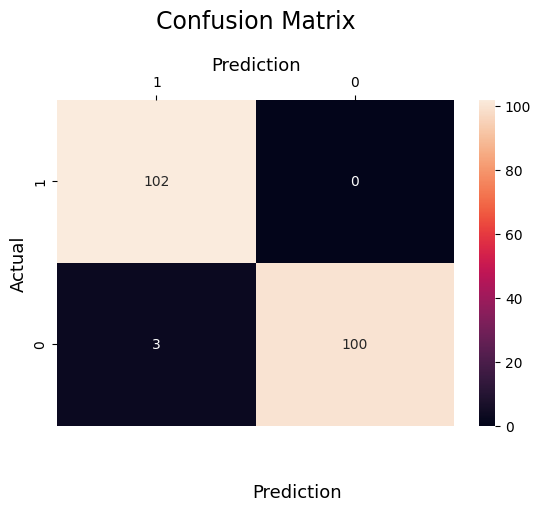

In [19]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['1','0'],
            yticklabels=['1','0']
            )
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



`By looking at the confusion matrix and classification reports we can that class 1 is predicted slightly better than class 0`


In [21]:
train_score = dt_classifier.score(X_train, y_train)
test_score = dt_classifier.score(X_test, y_test)

In [22]:
print(f'Train Score => {train_score}')
print(f'Test Score => {test_score}')

Train Score => 1.0
Test Score => 0.9853658536585366


`This shows that our model is not overfitting or underfitting as from the confusion matrix we can see that ouy model did not memorized the data`

# *Part F: Understanding Tree Depth (Manual Experiment)*


In [23]:
# Model 1 
model_1 = DecisionTreeClassifier(max_depth=2)
model_1

DecisionTreeClassifier(max_depth=2)

In [24]:
# trainning 
model_1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [25]:
model_1_pred = model_1.predict(X_test)


In [26]:
model_1_accuracy = accuracy_score(y_true=y_test,y_pred=model_1_pred)
print(f'The Accuracy of model 1 is {model_1_accuracy}')

The Accuracy of model 1 is 0.6780487804878049
